In [213]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
from math import pi,sin

In [215]:
def h(x):
    epsilon = np.random.normal(0,0.05,1)
    return 0.5 + 0.4 * sin(2*pi*x) + epsilon

In [216]:
x =  np.linspace(0,1,11)
h0 = np.array([0.5 + 0.4 * sin(2*pi*x) for x in x])
t1 = np.array([h(x) for x in x])
t2 = np.array([h(x) for x in x])
t3 = np.array([h(x) for x in x])

In [218]:
T = [h0,t1,t2,t3]

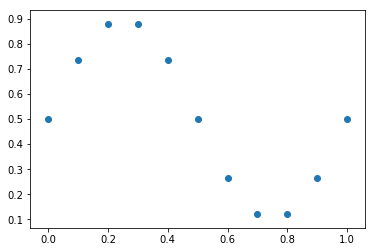

In [220]:
plt.scatter(x, T[0])
plt.show()

In [211]:
p1 = np.poly1d(np.polyfit(x, t1, 10).reshape(1,-1)[0])
p2 = np.poly1d(np.polyfit(x, t2, 10).reshape(1,-1)[0])
p3 = np.poly1d(np.polyfit(x, t3, 10).reshape(1,-1)[0])

In [228]:
def P(d):
    return [np.poly1d(np.polyfit(x, t, d).reshape(1,-1)[0]) for t in T]

In [234]:
D = [1,3,6,10]
P = [P(d) for d in D]

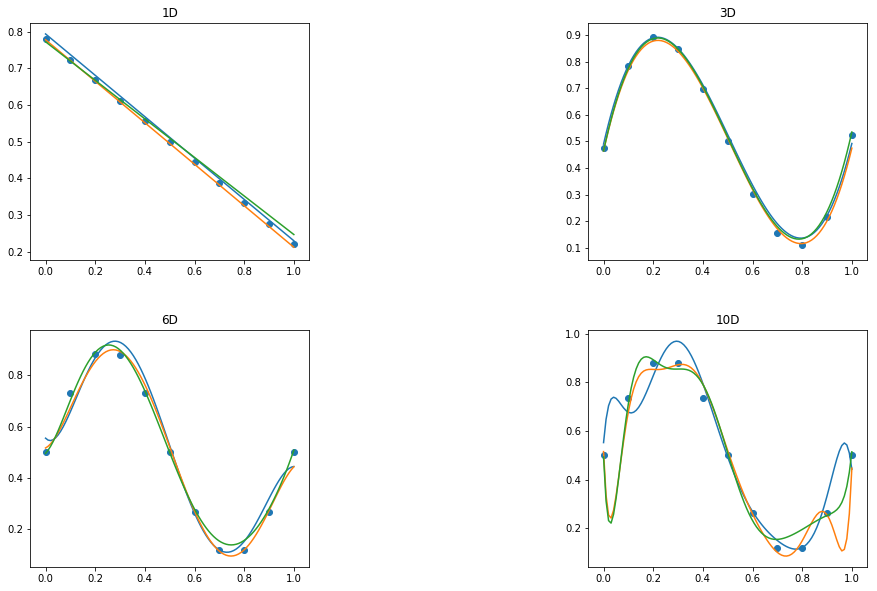

In [255]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=1, hspace=0.3)
for i, p in enumerate(P):
    plt.subplot(2, 2, i+1)
    p = P[i]
    plt.title(str(D[i]) + 'D')
    xp = np.linspace(0, 1,100)
    plt.scatter(x, p[0](x))
    for i in range(1,len(T)):
        plt.plot(xp, p[i](xp))
plt.show()

In [286]:
def Y(p):
    return np.array([p[i](x) for i in range(1,len(T))])
    
Y_vec = [Y(p) for p in P]

In [194]:
bias = (y.mean(axis=0) - h0)**2
bias

array([4.05929722e-05, 1.92055498e-03, 1.26770401e-03, 4.69135239e-04,
       4.12964410e-05, 7.08519419e-05, 2.37043649e-04, 7.69646867e-05,
       2.42777380e-05, 4.23013208e-05, 3.28368134e-04])

In [202]:
variance = np.array((y - y.mean(axis=0))**2).mean(axis=0)
variance

array([2.16486655e-03, 1.88258567e-03, 1.75052130e-03, 4.83576753e-04,
       5.34864961e-06, 3.34886316e-04, 1.34053239e-03, 2.05412584e-03,
       1.22821701e-03, 1.66302543e-04, 3.82986496e-04])

In [328]:
def bias(y):
    return np.array((y.mean(axis=0) - h0)**2).mean()

In [325]:
def variance(y):
     return np.array((y - y.mean(axis=0))**2).mean(axis=0).mean()

In [329]:
bias_list = [bias(y) for y in Y_vec]
pd.DataFrame(bias_list)

,0
0,0.041448
1,0.001306
2,0.000743
3,0.000873


In [326]:
variance_list = [variance(y) for y in Y_vec]
pd.DataFrame(variance_list)

,0
0,0.000089
1,0.000122
2,0.000361
3,0.000771


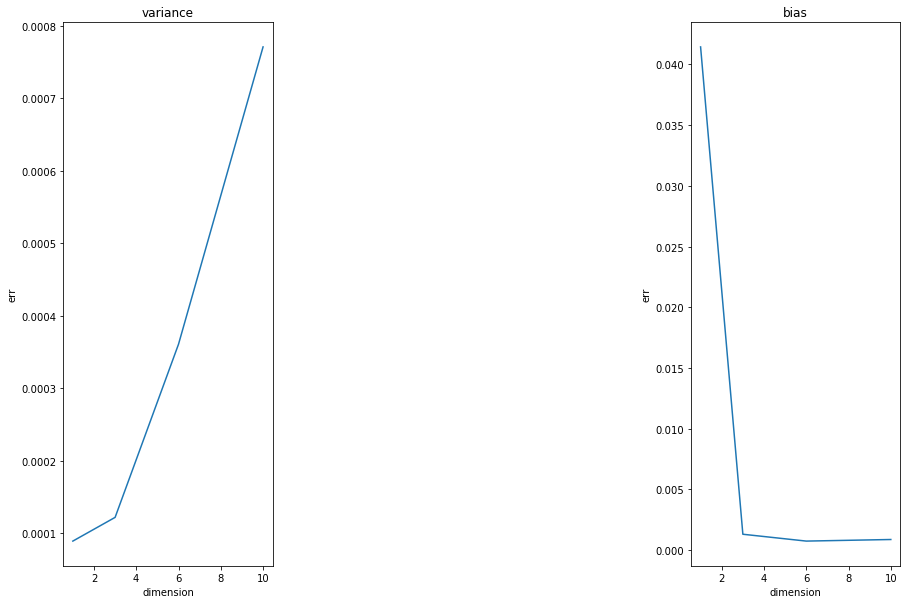

In [332]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=2)

plt.subplot(1, 2, 1)
plt.title('variance')
plt.xlabel('dimension')
plt.ylabel('err')
plt.plot(D, variance_list)

plt.subplot(1, 2, 2)
plt.title('bias')
plt.xlabel('dimension')
plt.ylabel('err')
plt.plot(D, bias_list)

plt.show()